<a href="https://colab.research.google.com/github/templar137/AI_project/blob/main/Resnet_%26_Densenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

1. Residual Block를 적용하지 않은 다수의 layer를 사용한 CNN

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = inputs
#x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(128)(x)
x = layers.Dense(10, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 128)       147584    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)       147584

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1563/1563 [==============================] - 137s 68ms/step - loss: 2.3120 - accuracy: 0.0987
Epoch 2/5
1563/1563 [==============================] - 107s 69ms/step - loss: 2.3035 - accuracy: 0.1004
Epoch 3/5
1563/1563 [==============================] - 106s 68ms/step - loss: 2.3033 - accuracy: 0.0981
Epoch 4/5
1563/1563 [==============================] - 107s 69ms/step - loss: 2.3031 - accuracy: 0.1021
Epoch 5/5
1563/1563 [==============================] - 106s 68ms/step - loss: 2.3031 - accuracy: 0.0996
313/313 - 6s - loss: 2.3028 - accuracy: 0.1000


[2.302828073501587, 0.10000000149011612]

2-1 max-pooling 없는 Resnet

In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = inputs
#x = layers.MaxPooling2D(2)(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = _x
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = x + _x
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = x + _x
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = x + _x
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(128)(x)
x = layers.Dense(10, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 128)  3584        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 128)  147584      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 128)  147584      conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 120s 75ms/step - loss: 2.0035 - accuracy: 0.3146 - val_loss: 1.3980 - val_accuracy: 0.4979
Epoch 2/15
1563/1563 [==============================] - 116s 74ms/step - loss: 1.2984 - accuracy: 0.5381 - val_loss: 1.1370 - val_accuracy: 0.6001
Epoch 3/15
1563/1563 [==============================] - 116s 74ms/step - loss: 1.0870 - accuracy: 0.6204 - val_loss: 1.0984 - val_accuracy: 0.6165
Epoch 4/15
1133/1563 [====================>.........] - ETA: 30s - loss: 0.9770 - accuracy: 0.6597

In [ ]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label = 'Training acc')
plt.plot(epochs, test_acc, label = 'Tset acc')
plt.legend
plt.figure
plt.show()

3. Densenet 실습


In [ ]:
inputs = keras.Input(shape=(32, 32, 3))
x = inputs
#x = layers.MaxPooling2D(2)(x)
_x = layers.Conv2D(64, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(64, 3, activation='relu', padding="same")(_x)
x = _x
x = layers.Conv2D(128, 1, activation='relu', padding="same")(x)
x = layers.AveragePooling2D(2)(x)

_x = layers.Conv2D(128, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = x + _x
_x = layers.Conv2D(128, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(128, 3, activation='relu', padding="same")(_x)
x = x + _x
x = layers.Conv2D(256, 1, activation='relu', padding="same")(x)
x = layers.AveragePooling2D(2)(x)


_x = layers.Conv2D(256, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(256, 3, activation='relu', padding="same")(_x)
x = x + _x
_x = layers.Conv2D(256, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(256, 3, activation='relu', padding="same")(_x)
x = x + _x
_x = layers.Conv2D(256, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(256, 3, activation='relu', padding="same")(_x)
x = x + _x
x = layers.Conv2D(512, 1, activation='relu', padding="same")(x)
x = layers.AveragePooling2D(2)(x)


_x = layers.Conv2D(512, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(512, 3, activation='relu', padding="same")(_x)
x = x + _x
_x = layers.Conv2D(512, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(512, 3, activation='relu', padding="same")(_x)
x = x + _x
_x = layers.Conv2D(512, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(512, 3, activation='relu', padding="same")(_x)
x = x + _x
_x = layers.Conv2D(512, 1, activation='relu', padding="same")(x)
_x = layers.Conv2D(512, 3, activation='relu', padding="same")(_x)
x = x + _x
x = layers.Conv2D(1024, 1, activation='relu', padding="same")(x)
x = layers.AveragePooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(128)(x)
x = layers.Dense(128)(x)
x = layers.Dense(10, activation='softmax')(x)
outputs = x

model = keras.Model(inputs, outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 32, 32, 64)   256         input_12[0][0]                   
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 32, 32, 64)   36928       conv2d_142[0][0]                 
__________________________________________________________________________________________________
conv2d_144 (Conv2D)             (None, 32, 32, 128)  8320        conv2d_143[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 58s 36ms/step - loss: 1.9220 - accuracy: 0.2922 - val_loss: 1.4314 - val_accuracy: 0.4839
Epoch 2/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.3408 - accuracy: 0.5111 - val_loss: 1.2481 - val_accuracy: 0.5643
Epoch 3/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1129 - accuracy: 0.6032 - val_loss: 1.0555 - val_accuracy: 0.6269
Epoch 4/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9399 - accuracy: 0.6652 - val_loss: 1.0052 - val_accuracy: 0.6476
Epoch 5/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8088 - accuracy: 0.7112 - val_loss: 0.9337 - val_accuracy: 0.6723
Epoch 6/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7054 - accuracy: 0.7490 - val_loss: 0.8926 - val_accuracy: 0.6987
Epoch 7/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6028 - accuracy: 0.7909 - val_loss: 0.8853 -

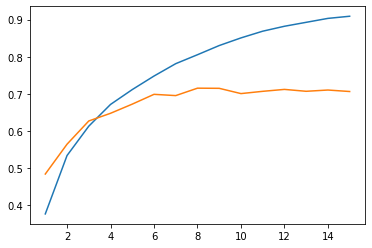

In [ ]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label = 'Training acc')
plt.plot(epochs, test_acc, label = 'Tset acc')
plt.legend
plt.figure
plt.show()